<a href="https://colab.research.google.com/github/Abogundipe/Analysis-of-NHTSA-Car-complaints/blob/main/Data_Cleaning_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Read all Excel File and return a DataFrame

In [21]:
# Call the Excel file and return to a Dataframe
import pandas as pd

def read_excel_file(file_path):
    return pd.read_excel(file_path)

# List of all file paths
file_paths = [
    '/content/drive/MyDrive/NHTSA Project/COMPLAINTS_RECEIVED_2020-2024.xlsx'
]

# Using list comprehension to apply the function to all file paths
df = [read_excel_file(path) for path in file_paths]

In [22]:
df1 = dfs[0]

In [23]:
df1.head(3)

,514472,842626,Ford Motor Company,FORD,E-250,1995,N,20050101,N.1,0,...,Unnamed: 39,MARLEY MOTORS,Unnamed: 41,BELVIDERE,IL.1,61008,V,Unnamed: 46,N.4,N.5
0,514473,896923,Ford Motor Company,FORD,THUNDERBIRD,1991.0,N,20010922,N,0,...,NaN,JOHNSON BROTHERS,254-791-1613,TEMPLE,TX,76503,V,NaN,N,N
1,514474,8001858,Ford Motor Company,FORD,EXPLORER,1995.0,N,20030714,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,514475,8004353,"Chrysler (FCA US, LLC)",CHRYSLER,CONCORDE,1993.0,N,20010306,Y,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [25]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236169 entries, 0 to 236168
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                           Non-Null Count   Dtype  
---  ------                                                                                                                                                                                                                                                                                                                           --------------   -----  
 0   514472                                                                                                                                                                                

# Rename the columns of the combined DataFrame

In [27]:

# List of new column names
column_names = [
    "Complain ID", "ODINO", "MANUFACTURER'S NAME", "VEHICLE MAKE", "VEHICLE MODEL",
    "MODEL YEAR", "WAS VEHICLE INVOLVED IN A CRASH", "DATE OF INCIDENT",
    "WAS VEHICLE INVOLVED IN A FIRE", "NUMBER OF PERSONS INJURED", "NUMBER OF FATALITIES",
    "SPECIFIC COMPONENT'S DESCRIPTION", "CONSUMER'S CITY", "CONSUMER'S STATE CODE",
    "VEHICLE'S VIN", "DATE ADDED TO FILE", "DATE COMPLAINT RECEIVED BY NHTSA",
    "VEHICLE MILEAGE AT FAILURE", "NUMBER OF OCCURRENCES", "DESCRIPTION OF THE COMPLAINT",
    "SOURCE OF COMPLAINT CODE", "WAS INCIDENT REPORTED TO POLICE", "DATE PURCHASED",
    "WAS ORIGINAL OWNER", "ANTI-LOCK BRAKES", "CRUISE CONTROL", "NUMBER OF CYLINDERS",
    "DRIVE TRAIN TYPE", "FUEL SYSTEM CODE", "FUEL TYPE", "VEHICLE TRANSMISSION TYPE",
    "VEHICLE SPEED", "DEPARTMENT OF TRANSPORTATION TIRE IDENTIFIER", "TIRE SIZE",
    "LOCATION OF TIRE CODE", "TYPE OF TIRE FAILURE CODE", "WAS PART ORIGINAL EQUIPMENT",
    "DATE OF MANUFACTURE", "TYPE OF CHILD SEAT CODE", "INSTALLATION SYSTEM CODE",
    "DEALER'S NAME", "DEALER'S TELEPHONE NUMBER", "DEALER'S CITY", "DEALER'S STATE CODE",
    "DEALER'S ZIPCODE", "PRODUCT TYPE CODE", "WAS DEFECTIVE TIRE REPAIRED",
    "MEDICAL ATTENTION REQUIRED", "WAS VEHICLE TOWED"
]

# Rename the columns of the combined DataFrame
df1.columns = column_names

In [29]:
df1.columns

Index(['Complain ID', 'ODINO', 'MANUFACTURER'S NAME', 'VEHICLE MAKE',
       'VEHICLE MODEL', 'MODEL YEAR', 'WAS VEHICLE INVOLVED IN A CRASH',
       'DATE OF INCIDENT', 'WAS VEHICLE INVOLVED IN A FIRE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF FATALITIES',
       'SPECIFIC COMPONENT'S DESCRIPTION', 'CONSUMER'S CITY',
       'CONSUMER'S STATE CODE', 'VEHICLE'S VIN', 'DATE ADDED TO FILE',
       'DATE COMPLAINT RECEIVED BY NHTSA', 'VEHICLE MILEAGE AT FAILURE',
       'NUMBER OF OCCURRENCES', 'DESCRIPTION OF THE COMPLAINT',
       'SOURCE OF COMPLAINT CODE', 'WAS INCIDENT REPORTED TO POLICE',
       'DATE PURCHASED', 'WAS ORIGINAL OWNER', 'ANTI-LOCK BRAKES',
       'CRUISE CONTROL', 'NUMBER OF CYLINDERS', 'DRIVE TRAIN TYPE',
       'FUEL SYSTEM CODE', 'FUEL TYPE', 'VEHICLE TRANSMISSION TYPE',
       'VEHICLE SPEED', 'DEPARTMENT OF TRANSPORTATION TIRE IDENTIFIER',
       'TIRE SIZE', 'LOCATION OF TIRE CODE', 'TYPE OF TIRE FAILURE CODE',
       'WAS PART ORIGINAL EQUIPMENT', 'DATE OF

In [30]:
df1.head()

,Complain ID,ODINO,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,DATE OF INCIDENT,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,...,INSTALLATION SYSTEM CODE,DEALER'S NAME,DEALER'S TELEPHONE NUMBER,DEALER'S CITY,DEALER'S STATE CODE,DEALER'S ZIPCODE,PRODUCT TYPE CODE,WAS DEFECTIVE TIRE REPAIRED,MEDICAL ATTENTION REQUIRED,WAS VEHICLE TOWED
0,514473,896923,Ford Motor Company,FORD,THUNDERBIRD,1991.0,N,20010922,N,0,...,NaN,JOHNSON BROTHERS,254-791-1613,TEMPLE,TX,76503,V,NaN,N,N
1,514474,8001858,Ford Motor Company,FORD,EXPLORER,1995.0,N,20030714,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,514475,8004353,"Chrysler (FCA US, LLC)",CHRYSLER,CONCORDE,1993.0,N,20010306,Y,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,514476,8009009,"Chrysler (FCA US, LLC)",JEEP,GRAND CHEROKEE,1995.0,N,19990108,Y,0,...,NaN,JEEP EAGLE OF DUPAGE,NaN,NaN,NaN,NaN,V,NaN,N,N
4,514477,8012091,Ford Motor Company,FORD,EXPEDITION,1997.0,N,20020609,Y,0,...,NaN,CAVALIER FORD,NaN,CHESAPEAKE,VA,23320,V,NaN,N,N


In [32]:
null_counts = df1.isnull().sum()
print (null_counts)

Complain ID                                          0
ODINO                                                0
MANUFACTURER'S NAME                                  1
VEHICLE MAKE                                         1
VEHICLE MODEL                                        1
MODEL YEAR                                           1
WAS VEHICLE INVOLVED IN A CRASH                      0
DATE OF INCIDENT                                     0
WAS VEHICLE INVOLVED IN A FIRE                       0
NUMBER OF PERSONS INJURED                            0
NUMBER OF FATALITIES                                 0
SPECIFIC COMPONENT'S DESCRIPTION                    10
CONSUMER'S CITY                                      2
CONSUMER'S STATE CODE                                2
VEHICLE'S VIN                                    61514
DATE ADDED TO FILE                                   2
DATE COMPLAINT RECEIVED BY NHTSA                     2
VEHICLE MILEAGE AT FAILURE                       64642
NUMBER OF 

In [33]:
# Create a deep copy of the Dataframe
df_copy = df1.copy()

# List of columns to be dropped
columns_to_drop = [
    "DEPARTMENT OF TRANSPORTATION TIRE IDENTIFIER",
    "TIRE SIZE",
    "LOCATION OF TIRE CODE",
    "TYPE OF TIRE FAILURE CODE",
    "WAS PART ORIGINAL EQUIPMENT",
    "DATE OF MANUFACTURE",
    "TYPE OF CHILD SEAT CODE",
    "INSTALLATION SYSTEM CODE",
    "DEALER'S NAME",
    "DEALER'S TELEPHONE NUMBER",
    "DEALER'S CITY",
    "DEALER'S STATE CODE",
    "DEALER'S ZIPCODE",
    "PRODUCT TYPE CODE",
    "WAS DEFECTIVE TIRE REPAIRED",
    "WAS ORIGINAL OWNER",
    "VEHICLE'S VIN",
    "DATE PURCHASED",
    "NUMBER OF CYLINDERS",
    "DRIVE TRAIN TYPE",
    "FUEL SYSTEM CODE",
    "FUEL TYPE",
    "VEHICLE TRANSMISSION TYPE",
    "ODINO",
    "SOURCE OF COMPLAINT CODE",
    "DATE ADDED TO FILE",
    "DATE COMPLAINT RECEIVED BY NHTSA",
    "PRODUCT TYPE CODE",
    "MEDICAL ATTENTION REQUIRED",
    "NUMBER OF OCCURRENCES"
]


In [35]:
# Drop the specified columns from the copy of the DataFrame
df_copy.drop(columns=columns_to_drop, axis=1, inplace=True)

In [37]:
# Verify Changes
df_copy.columns

Index(['Complain ID', 'MANUFACTURER'S NAME', 'VEHICLE MAKE', 'VEHICLE MODEL',
       'MODEL YEAR', 'WAS VEHICLE INVOLVED IN A CRASH', 'DATE OF INCIDENT',
       'WAS VEHICLE INVOLVED IN A FIRE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF FATALITIES', 'SPECIFIC COMPONENT'S DESCRIPTION',
       'CONSUMER'S CITY', 'CONSUMER'S STATE CODE',
       'VEHICLE MILEAGE AT FAILURE', 'DESCRIPTION OF THE COMPLAINT',
       'WAS INCIDENT REPORTED TO POLICE', 'ANTI-LOCK BRAKES', 'CRUISE CONTROL',
       'VEHICLE SPEED', 'WAS VEHICLE TOWED'],
      dtype='object')

In [41]:

df_copy.shape


(236169, 20)

In [42]:
df_copy.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,DATE OF INCIDENT,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED
0,514473,Ford Motor Company,FORD,THUNDERBIRD,1991.0,N,20010922,N,0,0,VEHICLE SPEED CONTROL:ACCELERATOR PEDAL,HOUSTON,TX,144509.0,WHILE THE CONSUMER WAS DRIVING ON THE HIGHWAY ...,N,N,Y,NaN,N
1,514474,Ford Motor Company,FORD,EXPLORER,1995.0,N,20030714,N,0,0,VEHICLE SPEED CONTROL,GLENDALE,NY,NaN,WHILE DRIVING 65 MPH VEHICLE SUDDENLY ACCELERA...,N,Y,Y,75.0,N
2,514475,"Chrysler (FCA US, LLC)",CHRYSLER,CONCORDE,1993.0,N,20010306,Y,0,0,"FUEL SYSTEM, GASOLINE:FUEL INJECTION SYSTEM",SMITHFIELD,NC,NaN,"WHILE DRIVING 25 MPH, THE VEHICLE CAUGHT ON FI...",Y,N,N,25.0,N
3,514476,"Chrysler (FCA US, LLC)",JEEP,GRAND CHEROKEE,1995.0,N,19990108,Y,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION,PLAINFIELD,IL,NaN,WHILE STRUCK IN SNOW WAS ACCELERATING AND ROCK...,Y,Y,Y,NaN,N
4,514477,Ford Motor Company,FORD,EXPEDITION,1997.0,N,20020609,Y,0,0,ELECTRICAL SYSTEM,CHESAPEAK,VA,NaN,VEHICLE WAS PARKED INSIDE OF THE DRIVEWAY AND ...,Y,Y,Y,NaN,N


In [45]:
null_counts = df_copy.isnull().sum()
print(null_counts)

Complain ID                              0
MANUFACTURER'S NAME                      1
VEHICLE MAKE                             1
VEHICLE MODEL                            1
MODEL YEAR                               1
WAS VEHICLE INVOLVED IN A CRASH          0
DATE OF INCIDENT                         0
WAS VEHICLE INVOLVED IN A FIRE           0
NUMBER OF PERSONS INJURED                0
NUMBER OF FATALITIES                     0
SPECIFIC COMPONENT'S DESCRIPTION        10
CONSUMER'S CITY                          2
CONSUMER'S STATE CODE                    2
VEHICLE MILEAGE AT FAILURE           64642
DESCRIPTION OF THE COMPLAINT             9
WAS INCIDENT REPORTED TO POLICE          4
ANTI-LOCK BRAKES                     15192
CRUISE CONTROL                       15192
VEHICLE SPEED                       103257
WAS VEHICLE TOWED                    15193
dtype: int64


In [46]:
# Create a copy and remove all rows with null values
df_copy2 =df_copy.copy()

# List of columns to check for null values
columns_to_check = [
    "MANUFACTURER'S NAME",
    "VEHICLE MAKE",
    "DATE OF INCIDENT",
    "VEHICLE MODEL",
    "MODEL YEAR",
    "CONSUMER'S STATE CODE",
    "SPECIFIC COMPONENT'S DESCRIPTION",
    "CONSUMER'S CITY",
    "DESCRIPTION OF THE COMPLAINT",
    "WAS INCIDENT REPORTED TO POLICE",
    "ANTI-LOCK BRAKES",
    "WAS VEHICLE TOWED",
    "CRUISE CONTROL"
]

# Drop rows where any of the specified columns have null values
df_copy2.dropna(subset=columns_to_check, inplace=True)


In [47]:
df_copy2.isnull().sum()

Complain ID                             0
MANUFACTURER'S NAME                     0
VEHICLE MAKE                            0
VEHICLE MODEL                           0
MODEL YEAR                              0
WAS VEHICLE INVOLVED IN A CRASH         0
DATE OF INCIDENT                        0
WAS VEHICLE INVOLVED IN A FIRE          0
NUMBER OF PERSONS INJURED               0
NUMBER OF FATALITIES                    0
SPECIFIC COMPONENT'S DESCRIPTION        0
CONSUMER'S CITY                         0
CONSUMER'S STATE CODE                   0
VEHICLE MILEAGE AT FAILURE          49450
DESCRIPTION OF THE COMPLAINT            0
WAS INCIDENT REPORTED TO POLICE         0
ANTI-LOCK BRAKES                        0
CRUISE CONTROL                          0
VEHICLE SPEED                       88058
WAS VEHICLE TOWED                       0
dtype: int64

In [49]:
# Verify Result
df_copy2.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,DATE OF INCIDENT,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED
0,514473,Ford Motor Company,FORD,THUNDERBIRD,1991.0,N,20010922,N,0,0,VEHICLE SPEED CONTROL:ACCELERATOR PEDAL,HOUSTON,TX,144509.0,WHILE THE CONSUMER WAS DRIVING ON THE HIGHWAY ...,N,N,Y,NaN,N
1,514474,Ford Motor Company,FORD,EXPLORER,1995.0,N,20030714,N,0,0,VEHICLE SPEED CONTROL,GLENDALE,NY,NaN,WHILE DRIVING 65 MPH VEHICLE SUDDENLY ACCELERA...,N,Y,Y,75.0,N
2,514475,"Chrysler (FCA US, LLC)",CHRYSLER,CONCORDE,1993.0,N,20010306,Y,0,0,"FUEL SYSTEM, GASOLINE:FUEL INJECTION SYSTEM",SMITHFIELD,NC,NaN,"WHILE DRIVING 25 MPH, THE VEHICLE CAUGHT ON FI...",Y,N,N,25.0,N
3,514476,"Chrysler (FCA US, LLC)",JEEP,GRAND CHEROKEE,1995.0,N,19990108,Y,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION,PLAINFIELD,IL,NaN,WHILE STRUCK IN SNOW WAS ACCELERATING AND ROCK...,Y,Y,Y,NaN,N
4,514477,Ford Motor Company,FORD,EXPEDITION,1997.0,N,20020609,Y,0,0,ELECTRICAL SYSTEM,CHESAPEAK,VA,NaN,VEHICLE WAS PARKED INSIDE OF THE DRIVEWAY AND ...,Y,Y,Y,NaN,N


In [50]:
df_copy2.shape

(220959, 20)

In [51]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220959 entries, 0 to 236168
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Complain ID                       220959 non-null  int64  
 1   MANUFACTURER'S NAME               220959 non-null  object 
 2   VEHICLE MAKE                      220959 non-null  object 
 3   VEHICLE MODEL                     220959 non-null  object 
 4   MODEL YEAR                        220959 non-null  float64
 5   WAS VEHICLE INVOLVED IN A CRASH   220959 non-null  object 
 6   DATE OF INCIDENT                  220959 non-null  int64  
 7   WAS VEHICLE INVOLVED IN A FIRE    220959 non-null  object 
 8   NUMBER OF PERSONS INJURED         220959 non-null  int64  
 9   NUMBER OF FATALITIES              220959 non-null  int64  
 10  SPECIFIC COMPONENT'S DESCRIPTION  220959 non-null  object 
 11  CONSUMER'S CITY                   220959 non-null  object

In [52]:
# Convert the 'DATE OF INCIDENT' to string, extract year and month, and assign to new columns
df_copy2['Year'] = df_copy2['DATE OF INCIDENT'].apply(lambda x: str(int(x))[:4] )

# drop the 'DATE OF INCIDENT' column as it's no longer needed
df_copy2.drop('DATE OF INCIDENT', axis=1, inplace=True)


In [53]:
# Display the first few rows to verify the changes
df_copy2.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
0,514473,Ford Motor Company,FORD,THUNDERBIRD,1991.0,N,N,0,0,VEHICLE SPEED CONTROL:ACCELERATOR PEDAL,HOUSTON,TX,144509.0,WHILE THE CONSUMER WAS DRIVING ON THE HIGHWAY ...,N,N,Y,NaN,N,2001
1,514474,Ford Motor Company,FORD,EXPLORER,1995.0,N,N,0,0,VEHICLE SPEED CONTROL,GLENDALE,NY,NaN,WHILE DRIVING 65 MPH VEHICLE SUDDENLY ACCELERA...,N,Y,Y,75.0,N,2003
2,514475,"Chrysler (FCA US, LLC)",CHRYSLER,CONCORDE,1993.0,N,Y,0,0,"FUEL SYSTEM, GASOLINE:FUEL INJECTION SYSTEM",SMITHFIELD,NC,NaN,"WHILE DRIVING 25 MPH, THE VEHICLE CAUGHT ON FI...",Y,N,N,25.0,N,2001
3,514476,"Chrysler (FCA US, LLC)",JEEP,GRAND CHEROKEE,1995.0,N,Y,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION,PLAINFIELD,IL,NaN,WHILE STRUCK IN SNOW WAS ACCELERATING AND ROCK...,Y,Y,Y,NaN,N,1999
4,514477,Ford Motor Company,FORD,EXPEDITION,1997.0,N,Y,0,0,ELECTRICAL SYSTEM,CHESAPEAK,VA,NaN,VEHICLE WAS PARKED INSIDE OF THE DRIVEWAY AND ...,Y,Y,Y,NaN,N,2002


# Visualizing the Date

In [54]:
df_copy2['Year'] = pd.to_numeric(df_copy2['Year'])

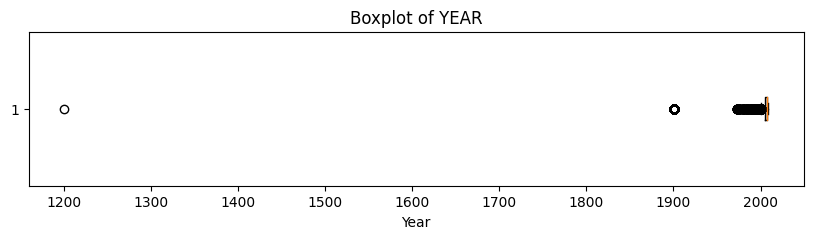

In [55]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
plt.boxplot(df_copy2['Year'], vert=False)  # Drop NA values if any
plt.title('Boxplot of YEAR')
plt.xlabel('Year')
plt.show()

# Sorting the Outlier

In [56]:
rows_outside_range = df_copy2.query('Year < 2004 or Year > 2024')

In [57]:
unique_years_outside_range = rows_outside_range['Year'].unique()


unique_years_outside_range

array([2001, 2003, 1999, 2002, 1901, 1997, 2000, 1991, 1993, 1200, 1984,
       1998, 1994, 1996, 1995, 1990, 1992, 1988, 1975, 1973, 1987, 1986,
       1985, 1976, 1979, 1989, 1981, 1982, 1980, 1977, 1983, 1974])

In [58]:
# Use df.query() to filter rows where 'Year' is between 2004 and 2024, inclusive
df = df_copy2.query('2004 <= Year <= 2024')

# Display the shape or a sample of the filtered DataFrame to verify the results
print(df.shape)


df.head()

(209480, 20)


,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
5,514478,"Nissan North America, Inc.",NISSAN,ALTIMA,2000.0,N,N,0,0,UNKNOWN OR OTHER,SUNNYVALE,CA,NaN,"HEAT DISPAY, SPEEDOMETER/ODOMETER/RPM METER FA...",N,N,Y,65.0,N,2005
6,514479,"Nissan North America, Inc.",NISSAN,ALTIMA,2000.0,N,N,0,0,ELECTRICAL SYSTEM,SUNNYVALE,CA,NaN,"HEAT DISPAY, SPEEDOMETER/ODOMETER/RPM METER FA...",N,N,Y,65.0,N,2005
13,514486,"Porsche Cars North America, Inc.",PORSCHE,911,2002.0,N,N,0,0,ENGINE AND ENGINE COOLING:ENGINE,CHANDLER,AZ,NaN,WHILE TRAVELING AT 45 MPH THERE WAS A LOUD RUM...,N,N,N,45.0,N,2005
14,514487,UNKNOWN MANUFACTURER,UNKNOWN,UNKNOWN,9999.0,N,N,0,0,TIRES,GRANITE CITY,IL,NaN,WHILE DRIVING THE FRONT INSIDE DUEL TIRE SEPA...,N,N,N,NaN,N,2005
17,514490,"Chrysler (FCA US, LLC)",PLYMOUTH,VOYAGER,1999.0,N,N,0,0,AIR BAGS:FRONTAL:DRIVER SIDE:INFLATOR MODULE,SAINT PETERSBURG,FL,NaN,CONSUMER STATES WHILE TRAVELING AIR BAG INDIC...,N,Y,N,NaN,N,2005


In [59]:
df.to_csv('/content/drive/MyDrive/NHTSA Project/COMPLAINTS_RECEIVED_2020-2024.csv', index=False, encoding='utf-8')

#/content/drive/MyDrive/NHTSA Project/COMPLAINTS_RECEIVED_2020-2024.xlsx